In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install keras
!pip install tensorflow
!pip install scikit-learn
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install scipy

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import MaxNLocator

In [ ]:
df = pd.read_csv('/vedanta_data_cleaned.csv')

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   REPORTED DATE           3606 non-null   object
 1   MONTH NAME              3606 non-null   object
 2   QUARTER                 3606 non-null   object
 3   BUSINESS CODE           3606 non-null   object
 4   SITE CODE               3605 non-null   object
 5   INCIDENT CATEGORY CODE  3606 non-null   object
 6   INCIDENT TYPE CODE      3606 non-null   object
 7   LAST UPDATED DATE       3606 non-null   object
 8   THREAT LEVEL NAME       3606 non-null   object
 9   MONTH                   3606 non-null   int64 
 10  OCCURRED DATE           3606 non-null   object
dtypes: int64(1), object(10)
memory usage: 310.0+ KB
None
             MONTH
count  3606.000000
mean      6.004437
std       3.857012
min       1.000000
25%       2.000000
50%       5.000000
75%      10.000000
max    

In [ ]:
date_columns = ['REPORTED DATE', 'LAST UPDATED DATE', 'OCCURRED DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


<ipython-input-5-162b970c1f3b>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [ ]:
df['REPORTED_MONTH'] = df['REPORTED DATE'].dt.month
df['REPORTED_QUARTER'] = df['REPORTED DATE'].dt.quarter

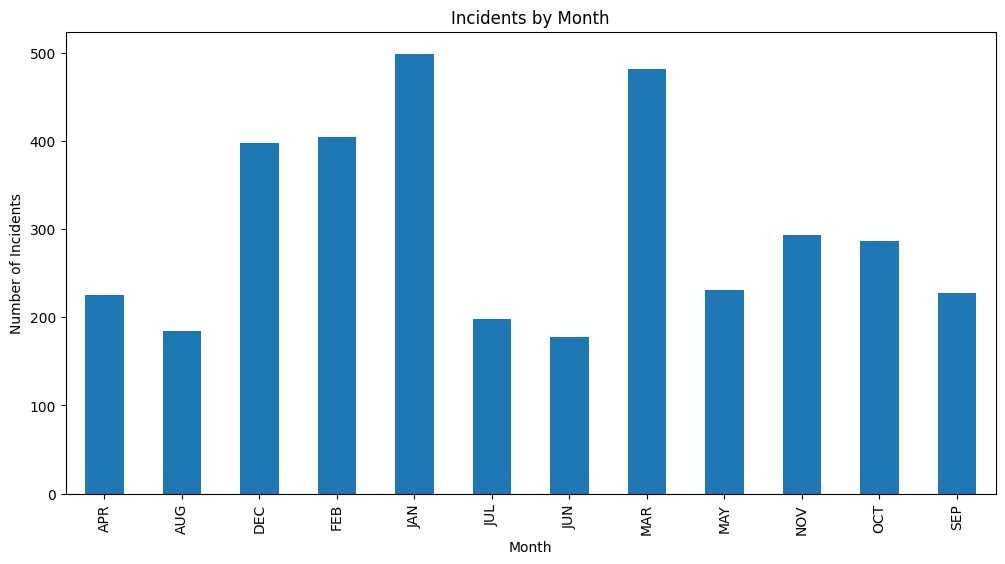

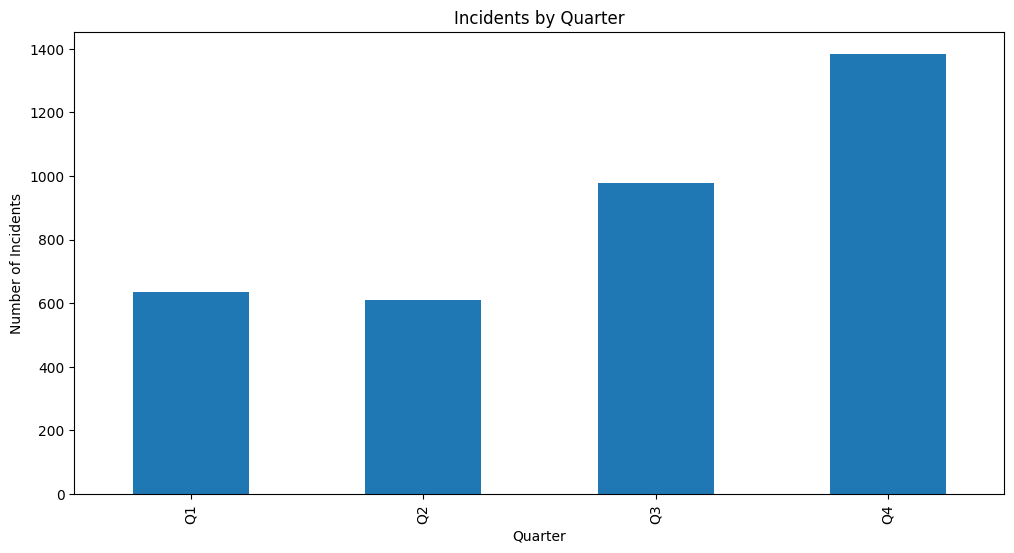

In [ ]:
plt.figure(figsize=(12, 6))
df['MONTH NAME'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

plt.figure(figsize=(12, 6))
df['QUARTER'].value_counts().sort_index().plot(kind='bar')
plt.title('Incidents by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Incidents')
plt.show()

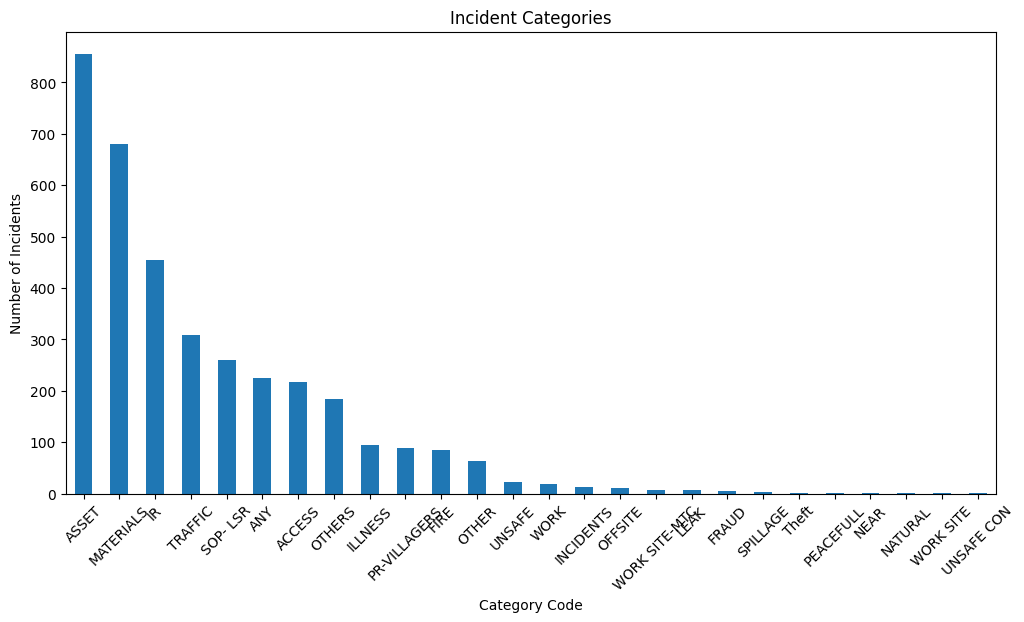

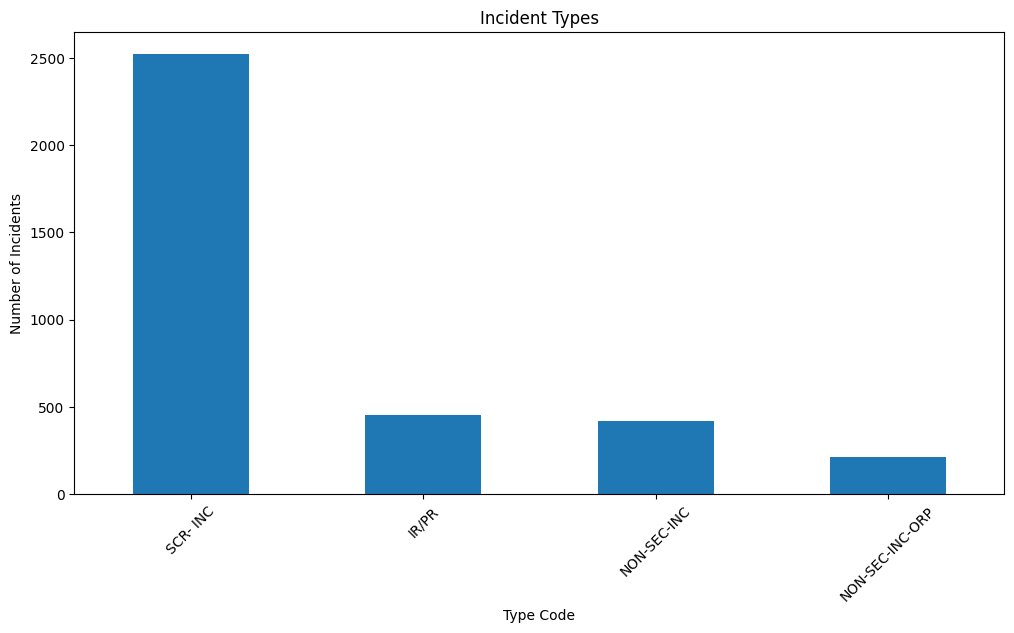

In [ ]:
plt.figure(figsize=(12, 6))
df['INCIDENT CATEGORY CODE'].value_counts().plot(kind='bar')
plt.title('Incident Categories')
plt.xlabel('Category Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('incident_categories.png')
plt.show()

plt.figure(figsize=(12, 6))
df['INCIDENT TYPE CODE'].value_counts().plot(kind='bar')
plt.title('Incident Types')
plt.xlabel('Type Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('incident_types.png')
plt.show()

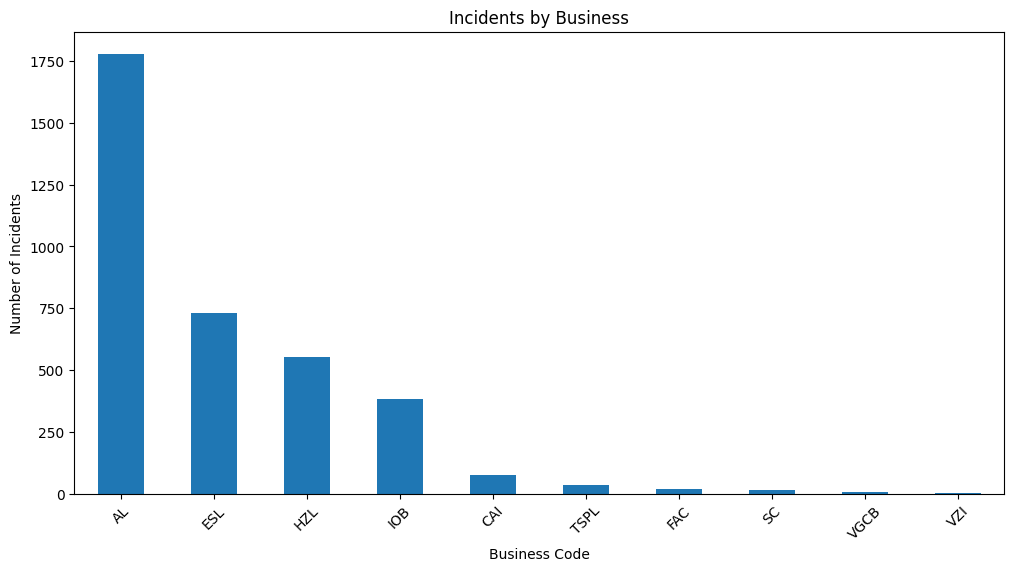

In [ ]:
plt.figure(figsize=(12, 6))
df['BUSINESS CODE'].value_counts().plot(kind='bar')
plt.title('Incidents by Business')
plt.xlabel('Business Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('incidents_by_business.png')
plt.show()

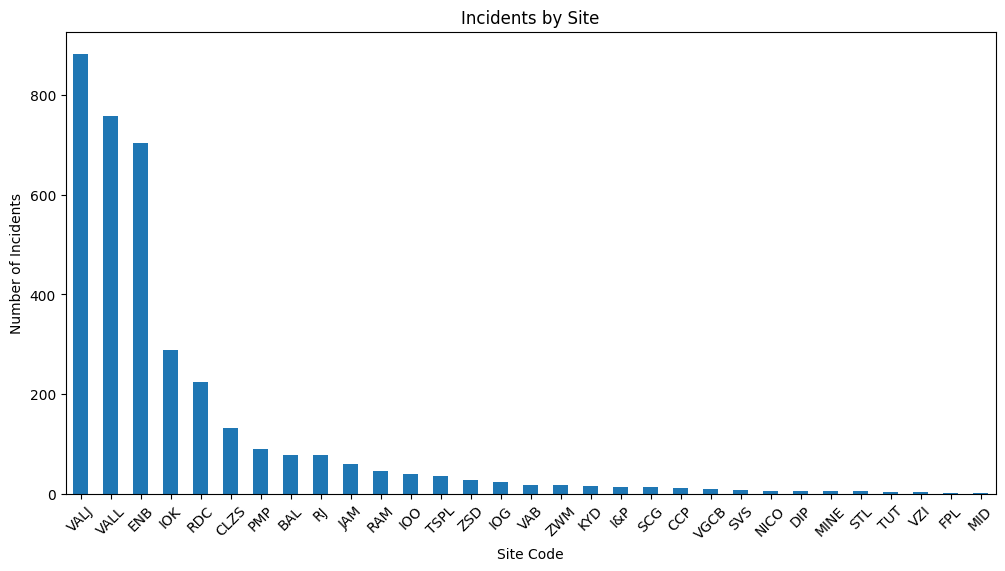

In [ ]:
plt.figure(figsize=(12, 6))
df['SITE CODE'].value_counts().plot(kind='bar')
plt.title('Incidents by Site')
plt.xlabel('Site Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('incidents_by_site.png')
plt.show()

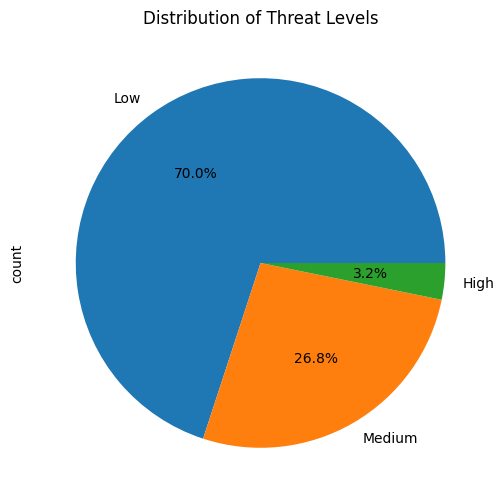

In [ ]:
plt.figure(figsize=(12, 6))
df['THREAT LEVEL NAME'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Threat Levels')
plt.savefig('threat_levels.png')
plt.show()

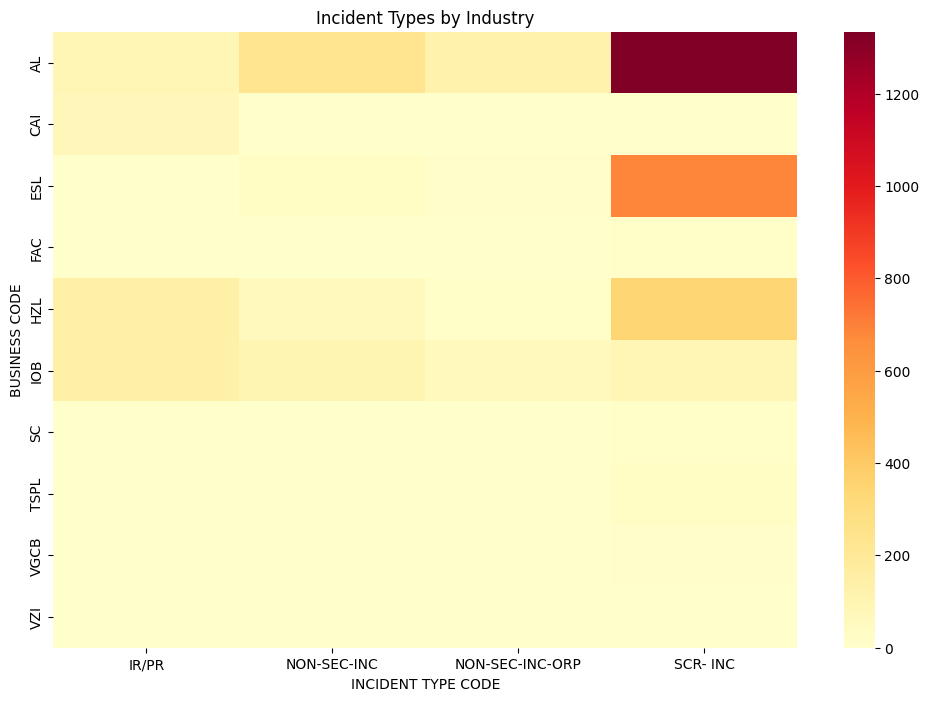

In [ ]:
industry_incident_type = pd.crosstab(df['BUSINESS CODE'], df['INCIDENT TYPE CODE'])
plt.figure(figsize=(12, 8))
sns.heatmap(industry_incident_type, cmap='YlOrRd')
plt.title('Incident Types by Industry')
plt.savefig('industry_incident_type_heatmap.png')
plt.show()

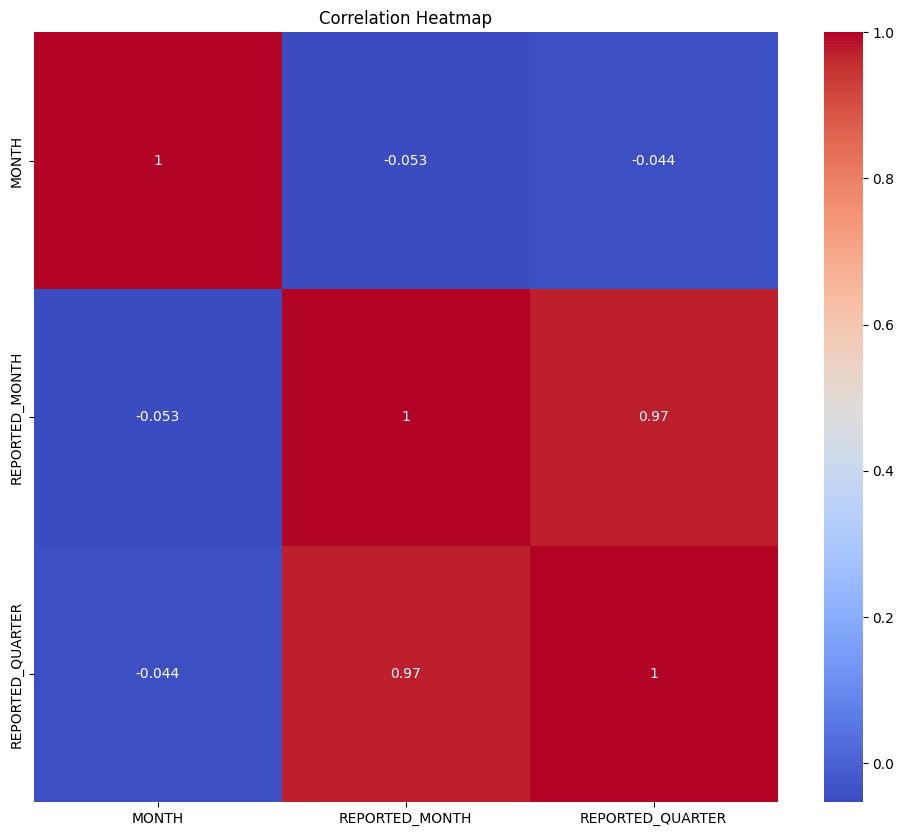

In [ ]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

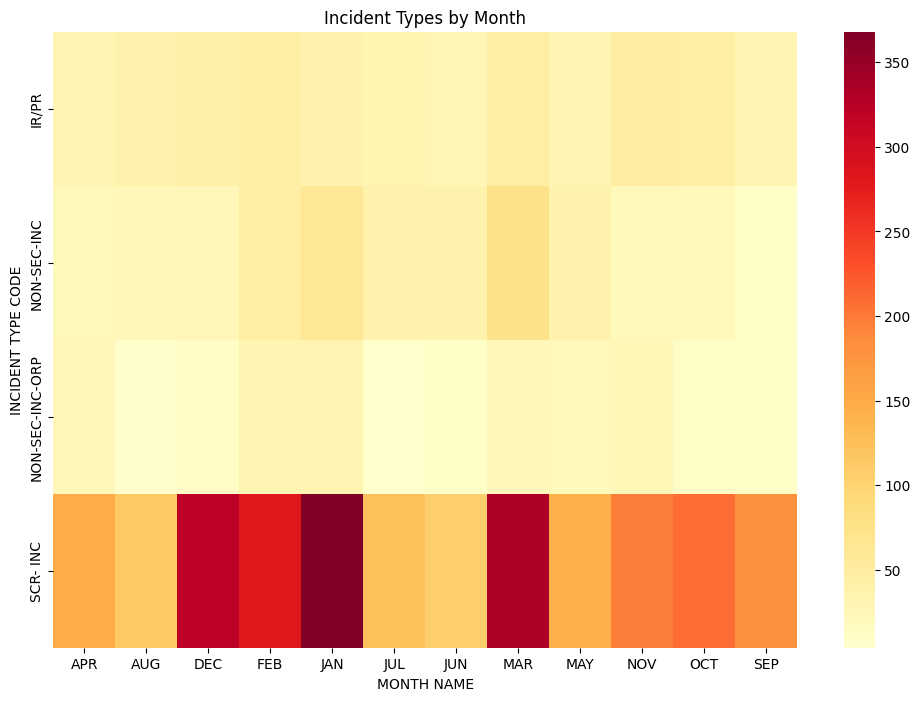

In [ ]:
incident_type_month = pd.crosstab(df['INCIDENT TYPE CODE'], df['MONTH NAME'])
plt.figure(figsize=(12, 8))
sns.heatmap(incident_type_month, cmap='YlOrRd')
plt.title('Incident Types by Month')
plt.savefig('incident_type_month_heatmap.png')
plt.show()

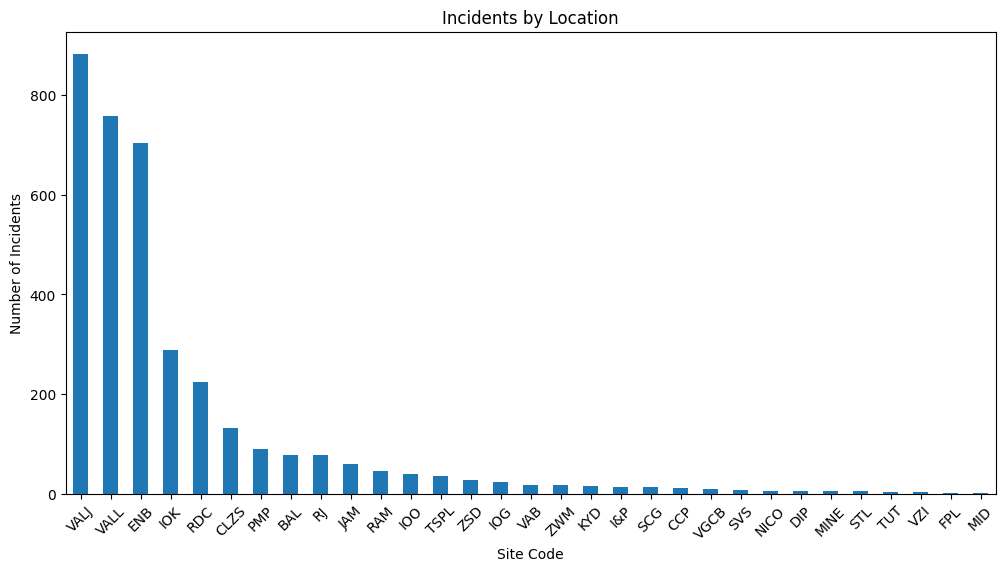

In [ ]:
plt.figure(figsize=(12, 6))
df['SITE CODE'].value_counts().plot(kind='bar')
plt.title('Incidents by Location')
plt.xlabel('Site Code')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.savefig('incidents_by_location.png')
plt.show()

In [ ]:
print(df.columns)

Index(['REPORTED DATE', 'MONTH NAME', 'QUARTER', 'BUSINESS CODE', 'SITE CODE',
       'INCIDENT CATEGORY CODE', 'INCIDENT TYPE CODE', 'LAST UPDATED DATE',
       'THREAT LEVEL NAME', 'MONTH', 'OCCURRED DATE', 'REPORTED_MONTH',
       'REPORTED_QUARTER'],
      dtype='object')


#**INCIDENT FREQUENCY PREDICTION**

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00


In [ ]:
df.set_index('REPORTED DATE', inplace=True)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
incident_counts = df.groupby(df.index.date).size()

In [ ]:
incident_counts = incident_counts.to_frame(name='Frequency')

In [ ]:
print(incident_counts.head())
print(incident_counts.columns)
print(incident_counts.index)

            Frequency
2023-01-04          9
2023-01-05          4
2023-01-06          4
2023-01-07          5
2023-01-08          9
Index(['Frequency'], dtype='object')
Index([2023-01-04, 2023-01-05, 2023-01-06, 2023-01-07, 2023-01-08, 2023-01-09,
       2023-01-10, 2023-01-11, 2023-01-12, 2023-02-04,
       ...
       2024-09-03, 2024-10-01, 2024-10-02, 2024-10-03, 2024-11-01, 2024-11-02,
       2024-11-03, 2024-12-01, 2024-12-02, 2024-12-03],
      dtype='object', length=140)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=106.620, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=104.625, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=108.615, Time=1.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=103.067, Time=0.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=106.965, Time=5.47 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=104.593, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=104.772, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit tim

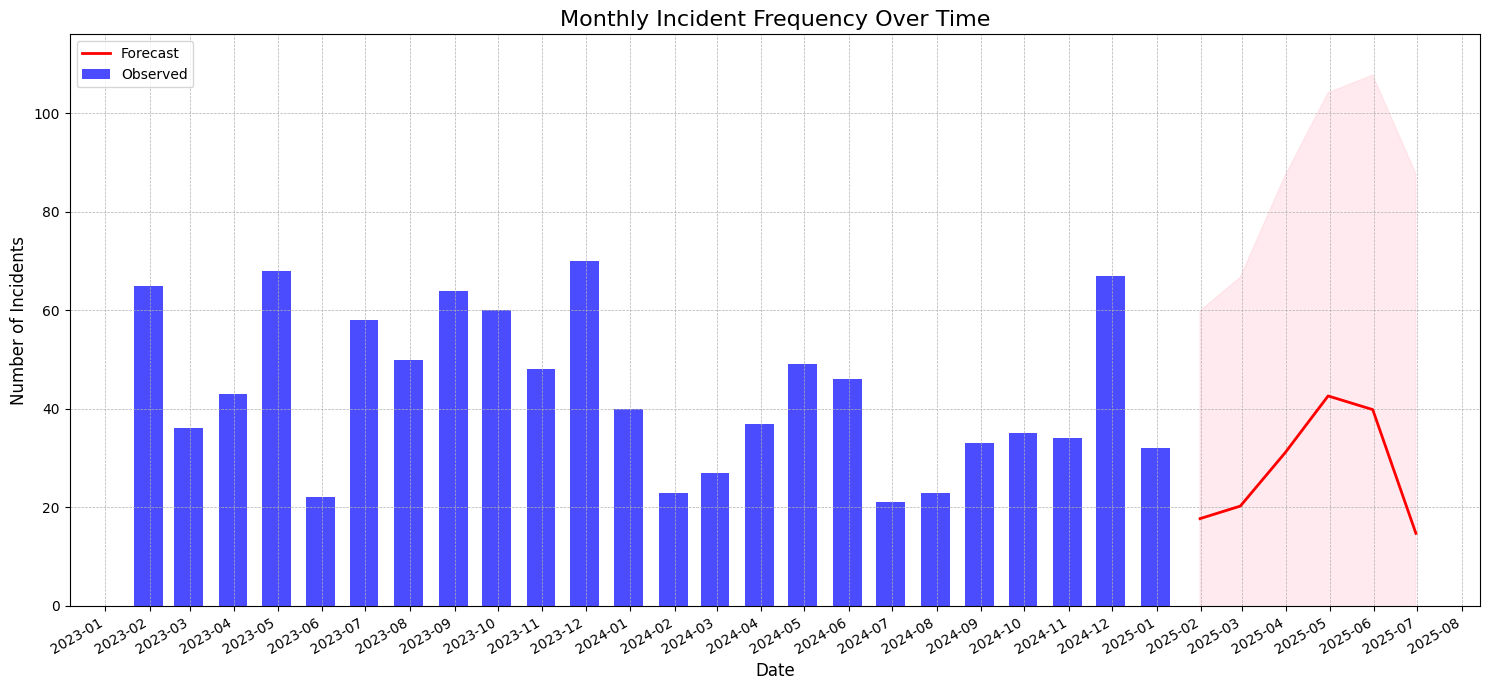

Monthly Forecast:
2025-01-31    17.696617
2025-02-28    20.242268
2025-03-31    31.026632
2025-04-30    42.603607
2025-05-31    39.831754
2025-06-30    14.708709
Freq: M, Name: Forecast, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert index to DatetimeIndex
incident_counts.index = pd.to_datetime(incident_counts.index)

# Sort the index
incident_counts = incident_counts.sort_index()

# Resample to monthly frequency
incident_counts_monthly = incident_counts['Frequency'].resample('M').sum()

# Fit auto ARIMA model
model = auto_arima(incident_counts_monthly, start_p=0, start_q=0, max_p=5, max_q=5,
                   m=12, start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Forecast
n_periods = 6  # Forecast for 6 months
forecast = model.predict(n_periods=n_periods)
conf_int = model.predict(n_periods=n_periods, return_conf_int=True)[1]

# Create forecast index
last_date = incident_counts_monthly.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='M')

# Create Series objects with the correct date index
fc_series = pd.Series(forecast, index=forecast_index, name='Forecast')
lower_series = pd.Series(conf_int[:, 0], index=forecast_index, name='Lower CI')
upper_series = pd.Series(conf_int[:, 1], index=forecast_index, name='Upper CI')

# Plotting
plt.figure(figsize=(15,7), dpi=100)

plt.bar(incident_counts_monthly.index, incident_counts_monthly.values, width=20, color='blue', alpha=0.7, label='Observed')
plt.plot(fc_series.index, fc_series.values, color='red', linewidth=2, label='Forecast')
plt.fill_between(fc_series.index, lower_series, upper_series, color='pink', alpha=.3)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# Set y-axis to start at 0
plt.ylim(bottom=0)

plt.title("Monthly Incident Frequency Over Time", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print the forecast
print("Monthly Forecast:")
print(fc_series)

In [ ]:
# print(fc_series)

In [ ]:
# print(model.summary())

In [ ]:
# print("Raw forecast values:")
# print(fc)
# print("\nConfidence intervals:")
# print(confint)

In [ ]:
# print(incident_counts.describe())
# print(incident_counts.isnull().sum())

# **THREAT-LEVEL BASED CLASSIFICATION & PREDICTION**


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['MONTH NAME']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['MONTH NAME']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        High       0.42      0.38      0.40        21
         Low       0.89      0.93      0.91       487
      Medium       0.81      0.71      0.76       214

    accuracy                           0.85       722
   macro avg       0.71      0.68      0.69       722
weighted avg       0.85      0.85      0.85       722



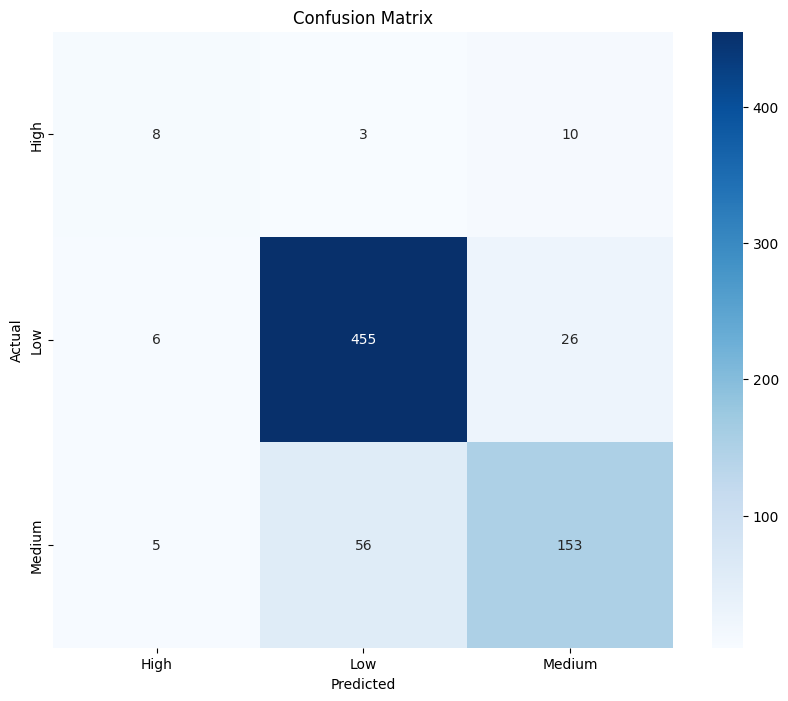

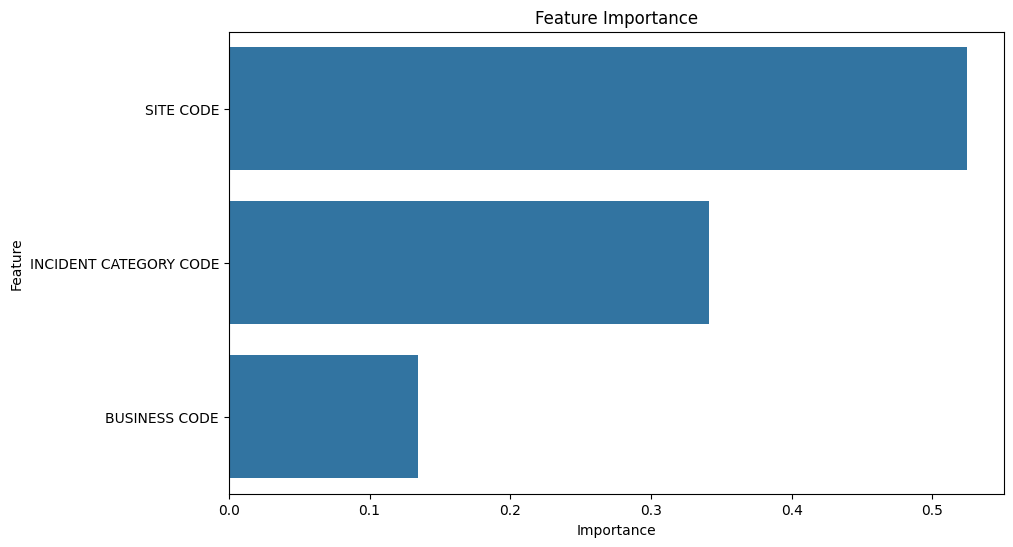

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['MONTH NAME']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


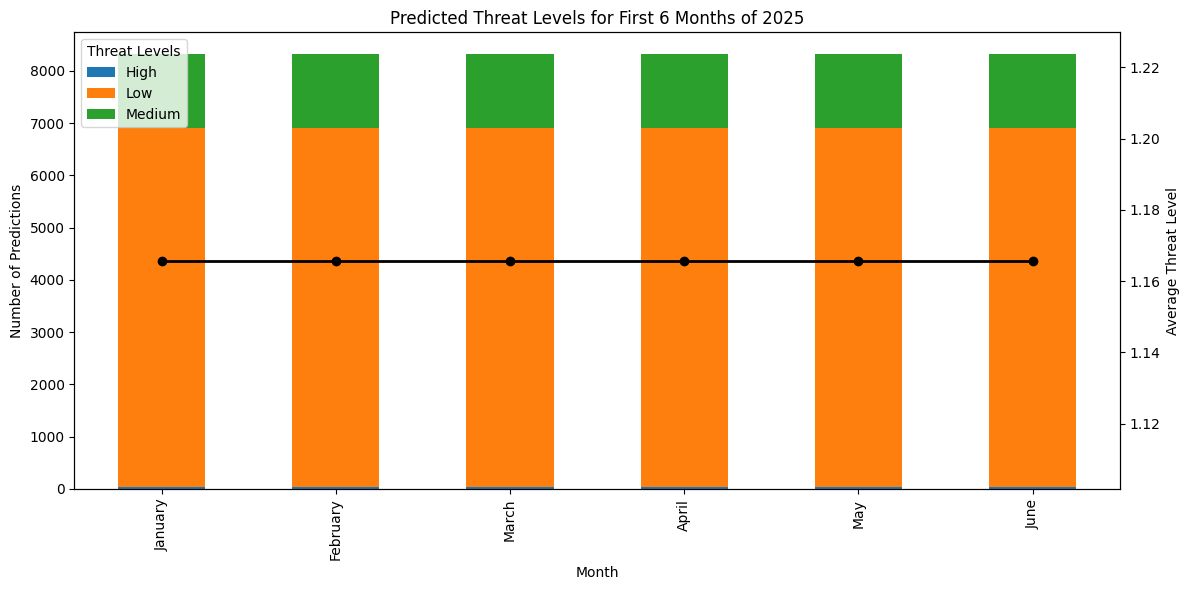


Summary of Predictions:
THREAT LEVEL
Low       0.823918
Medium    0.170913
High      0.005168
Name: proportion, dtype: float64

Monthly Average Threat Levels:
  MONTH NAME  THREAT LEVEL
3      April      1.165745
1   February      1.165745
0    January      1.165745
5       June      1.165745
2      March      1.165745
4        May      1.165745


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('/vedanta_data_cleaned.csv')

# Preprocess the data
features = ['BUSINESS CODE', 'SITE CODE', 'INCIDENT CATEGORY CODE', 'MONTH NAME']
target = 'THREAT LEVEL NAME'

# Create a custom month encoder
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_encoder = {month: i for i, month in enumerate(month_order)}

# Encode categorical variables
le = LabelEncoder()
for feature in features:
    if feature == 'MONTH NAME':
        df[feature] = df[feature].map(month_encoder)
    else:
        df[feature] = le.fit_transform(df[feature].astype(str))

# Encode target variable
le_target = LabelEncoder()
y = le_target.fit_transform(df[target].astype(str))

X = df[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Get feature names after imputation
feature_names = imputer.get_feature_names_out(features)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test_imputed)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Generate combinations for prediction
business_codes = df['BUSINESS CODE'].unique()
site_codes = df['SITE CODE'].unique()
incident_codes = df['INCIDENT CATEGORY CODE'].unique()
months = ['January', 'February', 'March', 'April', 'May', 'June']

# Create all combinations
combinations = []
for business in business_codes:
    for site in site_codes:
        for incident in incident_codes:
            for month in months:
                combinations.append([business, site, incident, month_encoder[month]])

# Create a DataFrame from the combinations
predict_df = pd.DataFrame(combinations, columns=features)

# Impute any missing values in the prediction data
predict_df_imputed = imputer.transform(predict_df)

# Make predictions
predictions = rf_model.predict(predict_df_imputed)
predict_df['THREAT LEVEL'] = le_target.inverse_transform(predictions)

# Calculate the average threat level for each month
monthly_avg_threat = predict_df.groupby('MONTH NAME')['THREAT LEVEL'].apply(
    lambda x: pd.Categorical(x, categories=le_target.classes_, ordered=True).codes.mean()
).reset_index()
monthly_avg_threat['MONTH NAME'] = [month_order[i] for i in monthly_avg_threat['MONTH NAME']]
monthly_avg_threat = monthly_avg_threat.sort_values('MONTH NAME')

# Count the occurrences of each threat level for each month
threat_counts = predict_df.groupby(['MONTH NAME', 'THREAT LEVEL']).size().unstack(fill_value=0)
threat_counts.index = [month_order[i] for i in threat_counts.index]
threat_counts = threat_counts.reindex(months)

# Create the mixed bar and line graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for threat level counts
threat_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Predictions')
ax1.legend(title='Threat Levels', loc='upper left')

# Line plot for average threat level
ax2 = ax1.twinx()
ax2.plot(range(len(months)), monthly_avg_threat['THREAT LEVEL'], color='black', marker='o', linewidth=2)
ax2.set_ylabel('Average Threat Level')

plt.title('Predicted Threat Levels for First 6 Months of 2025')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of Predictions:")
print(predict_df['THREAT LEVEL'].value_counts(normalize=True))
print("\nMonthly Average Threat Levels:")
print(monthly_avg_threat)

## **CATEGORY CODE BASED PREDICTION**

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   REPORTED DATE           3606 non-null   object
 1   MONTH NAME              3606 non-null   object
 2   QUARTER                 3606 non-null   object
 3   BUSINESS CODE           3606 non-null   object
 4   SITE CODE               3605 non-null   object
 5   INCIDENT CATEGORY CODE  3606 non-null   object
 6   INCIDENT TYPE CODE      3606 non-null   object
 7   LAST UPDATED DATE       3606 non-null   object
 8   THREAT LEVEL NAME       3606 non-null   object
 9   MONTH                   3606 non-null   int64 
 10  OCCURRED DATE           3606 non-null   object
dtypes: int64(1), object(10)
memory usage: 310.0+ KB
None

First few rows of the dataset:
  REPORTED DATE MONTH NAME QUARTER BUSINESS CODE SITE CODE  \
0    01-04-2023        APR      Q1          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Top 10 Feature Importances:
                          feature  importance
0        INCIDENT TYPE CODE_IR/PR    0.102925
1                     Day_of_Week    0.102698
2     INCIDENT TYPE CODE_SCR- INC    0.083156
3               BUSINESS CODE_ESL    0.062310
4                  SITE CODE_VALL    0.059025
5  INCIDENT TYPE CODE_NON-SEC-INC    0.058493
6                   SITE CODE_ENB    0.049608
7        THREAT LEVEL NAME_Medium    0.042929
8                  SITE CODE_VALJ    0.041357
9                BUSINESS CODE_AL    0.036930

Monthly predictions for the next 6 months:
Predicted_Category  ACCESS  ANY  ASSET  FIRE  IR  MATERIALS  OFFSITE  OTHER  \
OCCURRED DATE                                                                 
2025-01                  0    4     10     2   4          1        0      1   
2025-02                  1    1      6     3   7          2        0      1   
2025-03                  0    3      3     2  11          1        0      3   
2025-04                  1

<Figure size 1400x800 with 0 Axes>

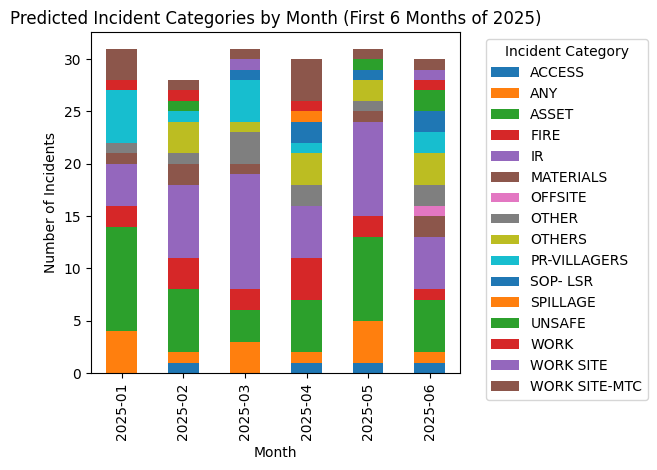


Total predicted incidents per month:
OCCURRED DATE
2025-01    31
2025-02    28
2025-03    31
2025-04    30
2025-05    31
2025-06    30
Freq: M, dtype: int64

Total predicted incidents per category over 6 months:
Predicted_Category
ACCESS            4
ANY              14
ASSET            37
FIRE             14
IR               41
MATERIALS         7
OFFSITE           1
OTHER            10
OTHERS           12
PR-VILLAGERS     13
SOP- LSR          6
SPILLAGE          1
UNSAFE            4
WORK              4
WORK SITE         2
WORK SITE-MTC    11
dtype: int64

Analysis complete. Monthly predictions have been displayed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/vedanta_data_cleaned.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Function to parse dates with multiple formats
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        try:
            return pd.to_datetime(date_str)
        except ValueError:
            return pd.NaT

# Data Preparation and Feature Engineering
date_columns = ['REPORTED DATE', 'LAST UPDATED DATE', 'OCCURRED DATE']
for col in date_columns:
    df[col] = df[col].apply(parse_date)

df['Day_of_Week'] = df['OCCURRED DATE'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)

# Encode categorical variables
categorical_cols = ['MONTH NAME', 'QUARTER', 'BUSINESS CODE', 'SITE CODE', 'INCIDENT TYPE CODE', 'THREAT LEVEL NAME']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Prepare features and target
X = df_encoded.drop(['INCIDENT CATEGORY CODE', 'REPORTED DATE', 'LAST UPDATED DATE', 'OCCURRED DATE', 'MONTH'], axis=1)
y = df_encoded['INCIDENT CATEGORY CODE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
print("\nTop 10 Feature Importances:")
print(feature_importance.head(10))

# Predicting Future Incidents
future_dates = pd.date_range(start='2025-01-01', end='2025-06-30')
future_df = pd.DataFrame({'OCCURRED DATE': future_dates})
future_df['MONTH'] = future_df['OCCURRED DATE'].dt.month
future_df['Day_of_Week'] = future_df['OCCURRED DATE'].dt.dayofweek
future_df['Is_Weekend'] = future_df['Day_of_Week'].isin([5, 6]).astype(int)
future_df['QUARTER'] = future_df['OCCURRED DATE'].dt.quarter
future_df['MONTH NAME'] = future_df['OCCURRED DATE'].dt.strftime('%B')

future_df_encoded = pd.get_dummies(future_df, columns=['MONTH NAME', 'QUARTER'])

for col in X.columns:
    if col not in future_df_encoded.columns:
        future_df_encoded[col] = 0

future_df_encoded = future_df_encoded[X.columns]

# Add some randomness to predictions to avoid constant categories
future_predictions = rf_model.predict_proba(future_df_encoded)
future_df['Predicted_Category'] = [np.random.choice(rf_model.classes_, p=probs) for probs in future_predictions]

# Group by month and count incidents per category
monthly_predictions = future_df.groupby([future_df['OCCURRED DATE'].dt.to_period('M'), 'Predicted_Category']).size().unstack(fill_value=0)

# Print monthly predictions
print("\nMonthly predictions for the next 6 months:")
print(monthly_predictions)

# Visualize monthly predictions
plt.figure(figsize=(14, 8))
monthly_predictions.plot(kind='bar', stacked=True)
plt.title('Predicted Incident Categories by Month (First 6 Months of 2025)')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print total incidents per month
print("\nTotal predicted incidents per month:")
print(monthly_predictions.sum(axis=1))

# Print total incidents per category over 6 months
print("\nTotal predicted incidents per category over 6 months:")
print(monthly_predictions.sum())

print("\nAnalysis complete. Monthly predictions have been displayed.")

##**INDUSTRY TYPE**

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['MONTH_NUM']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Shape of X before imputation: (3606, 9)
Columns in X before imputation: Index(['REPORTED_YEAR', 'REPORTED_MONTH', 'REPORTED_DAY', 'MONTH_NUM',
       'QUARTER', 'BUSINESS CODE', 'SITE CODE', 'INCIDENT CATEGORY CODE',
       'THREAT LEVEL NAME'],
      dtype='object')
Shape of X after imputation: (3606, 8)
Missing features after imputation: {'THREAT LEVEL NAME'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.91      0.92      0.91        84
           2       0.95      0.85      0.90        47
           3       0.98      0.99      0.98       513

    accuracy                           0.97       722
   macro avg       0.96      0.93      0.94       722
weighted avg       0.97      0.97      0.97       722



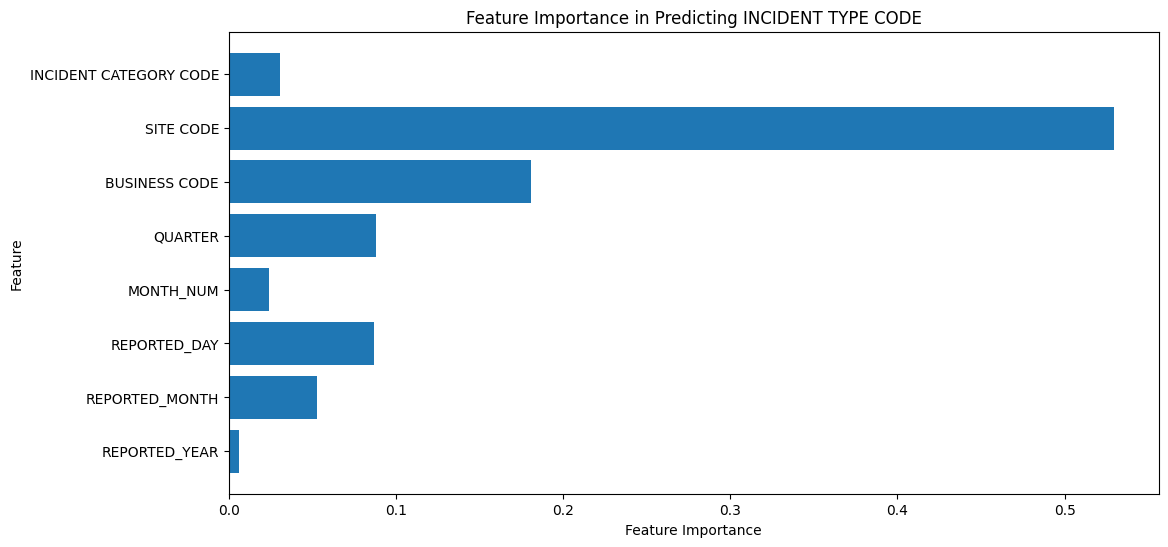

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['MONTH_NUM']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


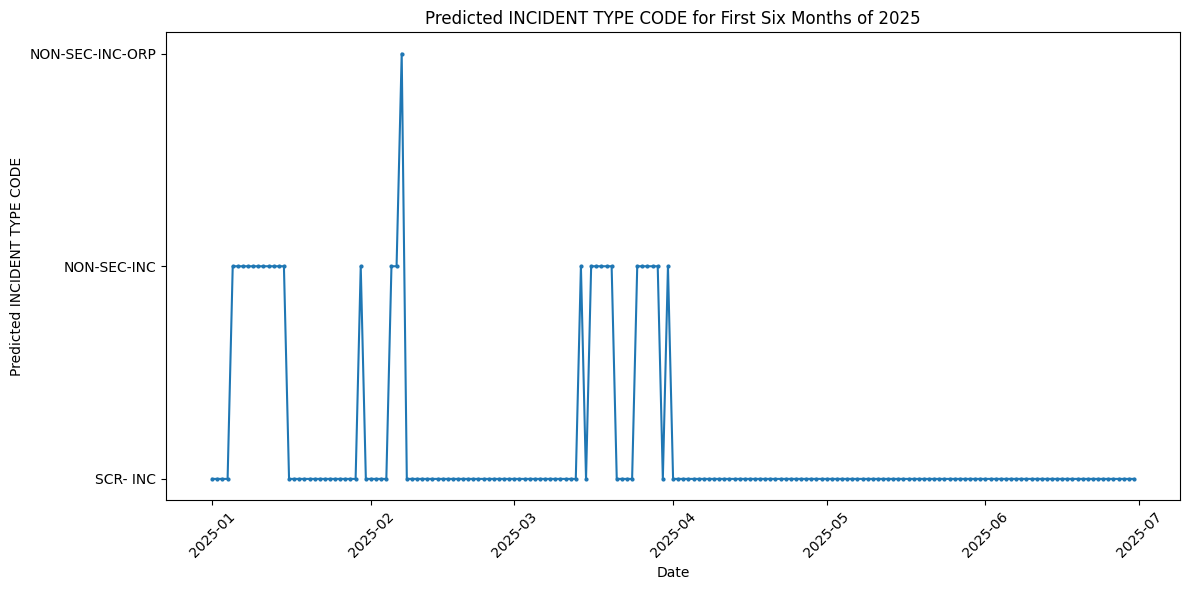

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/vedanta_data_cleaned.csv')

# Convert date columns to datetime format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y')
    except ValueError:
        try:
            return pd.to_datetime(date_str)
        except ValueError:
            return pd.NaT

date_columns = ['REPORTED DATE', 'LAST UPDATED DATE', 'MONTH NAME']
for col in date_columns:
    data[col] = data[col].apply(parse_date)

# Extract features from dates
data['REPORTED_YEAR'] = data['REPORTED DATE'].dt.year
data['REPORTED_MONTH'] = data['REPORTED DATE'].dt.month
data['REPORTED_DAY'] = data['REPORTED DATE'].dt.day

# Create a mapping for months
month_mapping = {month: i for i, month in enumerate(pd.date_range(start='2023-01-01', periods=12, freq='MS').strftime('%B'), 1)}
data['MONTH_NUM'] = data['MONTH NAME'].map(month_mapping)

# Handle missing values
numeric_features = ['REPORTED_YEAR', 'REPORTED_MONTH', 'REPORTED_DAY', 'MONTH_NUM']
categorical_features = ['QUARTER', 'BUSINESS CODE', 'SITE CODE', 'INCIDENT CATEGORY CODE', 'THREAT LEVEL NAME']

for col in numeric_features:
    data[col] = data[col].fillna(data[col].median())

for col in categorical_features:
    data[col] = data[col].fillna('Unknown')

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Encode target variable
target_encoder = LabelEncoder()
data['INCIDENT TYPE CODE'] = target_encoder.fit_transform(data['INCIDENT TYPE CODE'].astype(str))

# Select features for the model
features = numeric_features + categorical_features
X = data[features]
y = data['INCIDENT TYPE CODE']

# Ensure no missing values in the feature set
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Check the shape of the imputed DataFrame and its columns
print(f"Shape of X before imputation: {X.shape}")
print(f"Columns in X before imputation: {X.columns}")
print(f"Shape of X after imputation: {X_imputed.shape}")

# Identify missing features
imputed_features = pd.DataFrame(X_imputed, columns=features[:X_imputed.shape[1]]).columns
missing_features = set(features) - set(imputed_features)
print(f"Missing features after imputation: {missing_features}")

# Convert back to DataFrame to retain column names
X = pd.DataFrame(X_imputed, columns=features[:X_imputed.shape[1]])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot feature importance
feature_importance = model.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(features[:X_imputed.shape[1]], feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting INCIDENT TYPE CODE')
plt.show()

# Generate future predictions
future_dates = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')

# Ensure all transformed values exist in the label encoders
def safe_transform(label_encoder, values):
    unseen_values = set(values) - set(label_encoder.classes_)
    if unseen_values:
        # Add unseen values as new classes
        new_classes = list(label_encoder.classes_) + list(unseen_values)
        label_encoder.classes_ = np.array(new_classes)
    return label_encoder.transform(values)

future_data = pd.DataFrame({
    'REPORTED_YEAR': future_dates.year,
    'REPORTED_MONTH': future_dates.month,
    'REPORTED_DAY': future_dates.day,
    'MONTH_NUM': future_dates.month,
    'QUARTER': safe_transform(label_encoders['QUARTER'], [(d.month-1)//3 + 1 for d in future_dates]),
    'BUSINESS CODE': [data['BUSINESS CODE'].mode().iloc[0]] * len(future_dates),
    'SITE CODE': [data['SITE CODE'].mode().iloc[0]] * len(future_dates),
    'INCIDENT CATEGORY CODE': [data['INCIDENT CATEGORY CODE'].mode().iloc[0]] * len(future_dates),
    'THREAT LEVEL NAME': [data['THREAT LEVEL NAME'].mode().iloc[0]] * len(future_dates)
})

# Ensure no missing values in the future data
future_data_imputed = imputer.transform(future_data)

# Convert back to DataFrame to retain column names
future_data = pd.DataFrame(future_data_imputed, columns=features[:future_data_imputed.shape[1]])

# Make predictions
future_predictions = model.predict(future_data)

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, target_encoder.inverse_transform(future_predictions), marker='o', linestyle='-', markersize=2)
plt.xlabel('Date')
plt.ylabel('Predicted INCIDENT TYPE CODE')
plt.title('Predicted INCIDENT TYPE CODE for First Six Months of 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
